In [1]:
def plotLatent(latSort,clu=None, n = 2):
    for i in range(n):
        pyvis.qc_2var(*latSort.T[2*i:2*(i+1)],clu=clu)
#         pyvis.qc_2var(*latSort.T[2:4],clu=clu)


In [2]:
def diagnose(post):
    pyvis.heatmap(post.latent.T,)
    pyvis.heatmap(post.encoder)

    pyvis.heatmap(post.locPer.T)
    xs,ys = sutil.meanNorm(train_data),post.locPer
    pyvis.qc_2var(xs,ys, )
    plt.title(pyutil.mse(xs,ys))

    # ims = post.decoder.reshape([-1,8,8])
    # arr = post.locPer
def showIm(arr,nMax=10):
#     arr = post.encoder.T
    ims = arr.reshape([-1,8,8])
    ims = ims[:nMax]
    for Y in ims:
        pyvis.heatmap(Y)

In [31]:
import matplotlib as mpl;
mpl.use('Agg')
import synotil.dio as sdio;reload(sdio)
import synotil as synotil; reload(synotil)
import synotil.qcplots as pkg; reload(pkg)
import synotil.util as sutil;reload(sutil)
import synotil.PanelPlot as spanel;reload(spanel)
import synotil.CountMatrix as scount;reload(scount)

import pymisca.util as pyutil; reload(pyutil)
import pymisca.vis_util as pyvis; reload(pyvis)
import cPickle as pk

testi = 0

np = pyutil.np; pd = pyutil.pd
plt = pyutil.plt; 
if pyutil.hasIPD:
    get_ipython().magic('matplotlib inline')
    ! jupyter nbconvert test__HyperPlaneMixture.ipynb --to python

[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network


/home/feng/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/feng/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/feng/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/feng/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/f

[NbConvertApp] Converting notebook test__HyperPlaneMixture.ipynb to python
[NbConvertApp] Writing 14082 bytes to test__HyperPlaneMixture.py


In [5]:
# modelModule = "pymisca.tensorflow_extra_.matrix_decomp"
# modelModule = "pymisca.tensorflow_extra_.affine_gaussian"
modelModule = "pymisca.tensorflow_extra_.hyper_plane_mixture"
# modelModule = 'pymisca.tensorflow_extra_.gamma_radial_theta'
import importlib
mym = importlib.import_module(name=modelModule,)
reload(mym)

import pymisca.tensorflow_extra as pytf; reload(pytf)

/home/feng/.local/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning:

The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6




[WARN]unable to import edward.models
[WARN]unable to import edward.models


<module 'pymisca.tensorflow_extra' from '/home/feng/.local/lib/python2.7/site-packages/pymisca/tensorflow_extra.pyc'>

In [6]:

import sklearn.datasets as skdat
data = skdat.load_digits()
data.keys()
# all_data = data['data']
dfcc=  scount.countMatrix(data['data'])

import sklearn.tests as sktest
# sktest
import sklearn.model_selection as skms
kf = skms.KFold(n_splits=3)

all_data= dfcc.values
all_data = sutil.meanNorm(all_data)
# all_data = sutil.meanNorm(all_data.T,).T
# all_data = all_data.T
train_ind, test_ind = next(kf.split(all_data))
train_data = all_data[train_ind]
test_data = all_data[test_ind]


/usr/local/lib/python2.7/dist-packages/sklearn/feature_extraction/hashing.py:10: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/usr/local/lib/python2.7/dist-packages/scipy/io/matlab/mio4.py:18: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/usr/local/lib/python2.7/dist-packages/scipy/io/matlab/mio5.py:98: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/usr/local/lib/python2.7/dist-packages/sklearn/datasets/svmlight_format.py:25: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/home/feng/.local/lib/python2.7/site-packages/synotil/CountMatrix.py:142: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [8]:
# ns.name
# dir(ns)
# tf.name_sco

In [22]:
# reload(pytf)
# reload(mym)
reload(mym)
_class = mym.main
# _class = mym.
testi += 1

D = train_data.shape[-1]
mdls = {}
print '[testi]=%d'%testi

for seed in range(1):
    tf = pytf.tf
    tf.set_random_seed(seed+300)


    testi+=1
    
    mdl = _class(D=D,
                 L2loss=0.,
                 K=35,
#                  alpha = None,
#                  L2loss=1E5,
                                  name= 'test_%s'%testi,
#                                   mode='gateless',
#                                  mode='right',
                                 )
    TOL_LOSS = 0.1
#     opt = tf.train.AdamOptimizer(0.1)
    opt = None
    #     hist_loss = mdl.fit(train_data,optimizer=opt,n_iter = 2000,TOL_LOSS=TOL_LOSS)
    opt = tf.train.AdadeltaOptimizer(0.1)
    
    hist_loss = mdl.fit(train_data,optimizer=opt,
                        n_iter = 1000,
                        TOL_LOSS=TOL_LOSS)


    print ('[Done]')
    
pyutil.printlines(vars(mdl.prior).values())

sess = mdl.sess
import pymisca.vis_util as pyvis
import pymisca.tensorflow_extra as pytf; reload(pytf)
pytf.quick_eval

with sess.as_default():
#     post = pyutil
    mdl_post = post = pyutil.util_obj(**{k:pytf.quick_eval(mdl.post[k]) for k in mdl.post.__dict__ 
                                         if k != 'components'})
# assert 0
mdl_hpm = mdl

[testi]=3
('reuse', None)
Iter 100 -11236.974
Iter 200 -35558.89
Iter 300 -35612.57
Iter 400 -35662.26
Iter 500 -35712.4
Iter 600 -35763.26
Iter 700 -39888.21
Iter 800 -40020.85
Iter 900 -40793.65
Iter 1000 -41062.83
Iter 1100 -42483.64
Iter 1200 -43157.31
Iter 1300 -43205.33
Iter 1400 -43238.434
Iter 1500 -43464.45
Iter 1600 -43509.47
Iter 1700 -43539.83
Iter 1800 -43567.938
Iter 1900 -43841.75
Iter 2000 -44218.797
Iter 2100 -44248.918
Iter 2200 -44274.17
Iter 2300 -44298.88
Iter 2400 -44323.395
Iter 2500 -44347.727
Iter 2600 -44371.89
Iter 2700 -44395.867
Iter 2800 -44419.645
Iter 2900 -44443.23
[Done]
tf.distributions.Dirichlet("test_4/Dirichlet/", batch_shape=(), event_shape=(35,), dtype=float32)
[WARN]unable to import edward.models


-2939.7656849910863
[MSG] Now Fitting Model:Test_genre=KMEANS_maxIt=1000_randomState=None_nClu=30


/home/feng/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

divide by zero encountered in log

/home/feng/.local/lib/python2.7/site-packages/synotil/CountMatrix.py:142: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



[SUCC] to fit Model:Test_genre=KMEANS_maxIt=1000_randomState=None_nClu=30
-2613.9210488087942


/home/feng/.local/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

divide by zero encountered in log



AssertionError: 

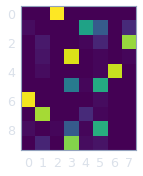

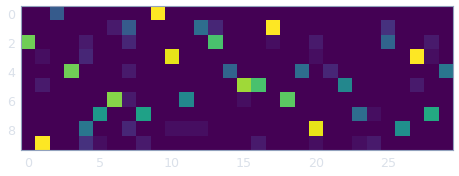

In [25]:
# mdl_hpm = mdl

def getConfusionMat(mdl):
    pred_targ = mdl.predict(test_data)
    dfc = pd.DataFrame(dict(pred=pred_targ, ground=test_targ))
    dfc['num'] = 1
    confusion = dfc.pivot_table(index='ground',columns='pred',values='num',aggfunc='sum').fillna(0.)
    return confusion

all_targ = data['target']
test_targ = all_targ[test_ind]


confusion_hpm = getConfusionMat(mdl_hpm)
mi = pyutil.entExpect(np.log(confusion_hpm.values))

msg = 'MutualInfo on test set is %f'% mi
assert mi < 2500,'[FAILED]' +msg
print ('[PASSED]:' + msg)

pyvis.heatmap(confusion_hpm)

pyutil.sys.exit(0)
# mdl_GMM = sutil.fit_BGM(train_data,nClu=35,covariance_type = 'full').model
# confusion_GMM = getConfusionMat(mdl,)
# pyvis.heatmap(confusion_GMM)

mdl = sutil.fit_KMEANS(train_data,nClu=30)
confusion_kmean = getConfusionMat(mdl.model)
mi = pyutil.entExpect(np.log(confusion_kmean.values))
print (mi)
pyvis.heatmap(confusion_kmean)

assert 0

In [26]:
! jupyter nbconvert test__HyperPlaneMixture.ipynb --to python

[NbConvertApp] Converting notebook test__HyperPlaneMixture.ipynb to python
[NbConvertApp] Writing 14094 bytes to test__HyperPlaneMixture.py


In [ ]:
tf.saved_model.simple_save(mdl.sess,'modeltest',inputs={'x':mdl.x_place},outputs={'y':mdl.proba})

In [ ]:
saver = tf.train.Saver()
save_path = saver.save(mdl.sess, "./testModel.ckpt")

In [ ]:
print("Model saved in path: %s" % save_path)

In [ ]:
# # Later, launch the model, initialize the variables, do some work, and save the
# # variables to disk.
# with tf.Session() as sess:
#   sess.run(init_op)
#   # Do some work with the model.
#   inc_v1.op.run()
#   dec_v2.op.run()
#   # Save the variables to disk.
#   save_path = saver.save(sess, "/tmp/model.ckpt")
#   print("Model saved in path: %s" % save_path)

In [ ]:
saver = tf.train.Saver()
# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "/tmp/model.ckpt")
  print("Model restored.")
  # Check the values of the variables
  print("v1 : %s" % v1.eval())
  print("v2 : %s" % v2.eval())


In [ ]:
mdl = tf.saved_model.loader.load()

In [ ]:
mdl = tf.saved_model.loader.load

In [ ]:
plt.plot(sorted(post.weight))

In [ ]:
showIm(post.mean[np.argsort(post.weight)[::-1][:10]],nMax=50)

In [ ]:
all_targ = data['target']
test_targ = all_targ[test_ind]

In [ ]:
def getConfusionMat(mdl):
    pred_targ = mdl.predict(test_data)

    dfc = pd.DataFrame(dict(pred=pred_targ, ground=test_targ))
    dfc['num'] = 1
    confusion = dfc.pivot_table(index='ground',columns='pred',values='num',aggfunc='sum').fillna(0.)
    return confusion

In [ ]:
confusion_hpm = getConfusionMat(mdl)

In [ ]:
mdl = sutil.fit_BGM(train_data,nClu=35,covariance_type = 'full')

In [ ]:
confusion_GMM = getConfusionMat(mdl.model,)

In [ ]:
mdl = sutil.fit_KMEANS(train_data,nClu=30)
confusion_kmean = getConfusionMat(mdl.model)

In [ ]:
pyvis.heatmap(confusion_kmean)

In [ ]:
pyvis.heatmap(confusion_hpm)

In [ ]:
import sklearn.mixture as skmix
# skmix.VBGMMx.

In [ ]:
pyvis.heatmap(confusion_GMM)

In [ ]:
proba = mdl.predict_proba(test_data)

In [ ]:
# showIm(arr=)

In [ ]:
# clu==1

In [ ]:
# plt.set_cmap()

In [ ]:
showIm(train_data[0:5])

In [ ]:
# skdat.u
import sklearn.utils as skutil
# skutil.optimizel.
# spane

In [ ]:
pyvis.histoLine(test_data)

In [ ]:
cluCount = pyutil.get_cluCount(pd.DataFrame(clu,columns=['clu']))
pyutil.ipd.display(cluCount.T)
showIm(test_data[clu==0])

In [ ]:
# pyvis.heatmap(test_data[clu==0],cname='test')

In [ ]:
clu = mdl.predict(test_data)

In [ ]:
# clu.query()
# cdot = clu[None] == data.target[test_ind][:,None]

In [ ]:

im = pyutil.spdist.squareform(post.scale)
pyvis.heatmap(im,cname='scale')

im = pyutil.spdist.squareform(post.loc)
pyvis.heatmap(im,cname='loc')

im = pyutil.spdist.squareform(post.loc/post.scale)
pyvis.heatmap(im,cname='loc/scale')
# pyvis.heatmap()

In [ ]:
post = sutil.fit_PCA(train_data)
post = pyutil.util_obj(**post)
post.latent = post.trans_data
post.encoder = post.model.components_
# post.latent.shape
# post.encoder.shape
post.locPer = post.latent.dot(post.encoder)
pca_post = post

In [ ]:
mean.shape

In [ ]:
showIm(post.mean[:5],nMax=5)

In [ ]:
post = mdl_post
diagnose(post)

showIm(post.locPer[:5],nMax=2)
plt.show()
print('ttttttttttttt')
showIm(post.encoder[:5],nMax=5)

In [ ]:
post.beta

In [ ]:
mean = mdl.post.mean.eval(session=mdl.sess)

In [ ]:
post = pca_post
diagnose(post)

showIm(post.locPer[:5],nMax=2)
plt.show()
print('ttttttttttttt')
showIm(post.encoder[:5],nMax=5)

In [ ]:
# sutil.qc_Sort(df=dfcc)

In [ ]:
C = sutil.meanNorm(test_data)
pred = reduce(np.matmul,[C,post.encoder,post.decoder])
orig = sutil.meanNorm(C)


latent = C.dot(post.encoder)
# latent = test_data.dot(post.encoder)
xvar = latent.std(axis=0)
vidx = xvar.argsort()[::-1]
latSort = latent[:,vidx]


dfc = reduce(np.matmul,[all_data,post.encoder])[:,vidx]
allLatent = dfcc.setDF(dfc)
# allLatent = 
score_all = allLatent.values ** 2
score_all = score_all / score_all.sum(axis=1,keepdims=1)
# smax = score_all.argmax(axis=1)
smax = allLatent.values.argmax(axis=1)
# score = allLatent.values[(smax,[1]*len(smax))]
score = score_all.max(axis=1)
clu  = scount.countMatrix(zip(smax,score),index=dfcc.index)
# clu = dfcc.setDF(zip(clu,score))

clu.columns = ['clu','score']
cluc=clu
# cluc = sutil.tidyBd(clu)

clu.hist('score')

# pyvis.latex_table_talbula
xs,ys = sutil.meanNorm(train_data),post.locPer
pyvis.qc_2var(xs,ys, )
plt.title(pyutil.mse(xs,ys))
plt.figure()
plt.plot(post.latentScaleNorm)
plt.ylim(bottom=0)

In [ ]:
plt.plot(sorted(post.latentScaleNorm)[::-1])
plt.ylim(bottom=0)

In [ ]:
plt.plot(sorted(post.latentScaleNorm)[::-1][:25],'x')
plt.ylim(bottom=0)

In [ ]:
plt.plot(sorted(post.latentScaleNorm)[::-1][:25],'x')
plt.ylim(bottom=0)

In [ ]:
cluCount = clu.groupby('clu').apply(len).to_frame().reset_index()
print cluCount.shape
cluCount.T

In [ ]:
try:
    pyutil.plt.plot(post.ycat.std(axis=0))

    pyutil.span(post.ycat,100)

    if 'hyperDiri' in vars(post).keys():
        pyutil.plt.plot(sorted(post.hyperDiri)[::-1])
        plt.ylim(0., 0.2)
except Exception as e:
    print e
# mdl.prior.__dict__


%pdb  0

for key in ['scale','gate','xcat_scale','xcat_scale_raw',
            'hyperDiri'
           ]:
    if key not in post.__dict__.keys():
        print ('Cannot find key:%s'%key)
        continue
    val = post[key]
    print key,':',
    if key in mdl.prior.__dict__.keys():
        print mdl.prior[key]
    if val.ndim ==2:
        print val.flat[0]
    else:
        print val
    print 
#     print post[key]

errF = pyutil.mse
keys = ['Age','gtype',
        'light','ZTime_int',
        'RunID'
       ]
# mcurr = mcurr0.reset_index().sort_values(keys)
# dfcm  = dfc.reindex(columns=mcurr.DataAcc)

C = sutil.meanNorm(test_data)
# pred = reduce(np.matmul,[C,post.encoder,post.decoder])
pred = C.dot(post.encoder)
# pred = pred[:,1:] * post.signal_scale + pred[:,:-1] * (1- post.signal_scale)
pred = pred.dot(post.decoder)
# pred = l2_normalise(C.dot(post.encoder),axis=-1).dot(post.decoder)
orig = sutil.meanNorm(C)


latent = C.dot(post.encoder)
# latent = l2_normalise(latent,axis=-1)
# latent = latent / np.sum(latent**2, axis=-1,keepdims=1)**0.5
# latent = test_data.dot(post.encoder)
xvar = latent.std(axis=0)
vidx = xvar.argsort()[::-1]
latSort = latent[:,vidx]

pyvis.heatmap(latent.T,cname='test')
pyvis.heatmap(latSort.T)

# err = np.mean(np.square((orig-pred)))
err = errF(pred,orig)
# orig = sutil.meanNorm(train_data)
# tf.l2 = pred-orig
pyvis.qc_2var(orig,pred)
plt.title('err=%.3E'%err)
fig,axs = plt.subplots(3,1,figsize=[14,8]); i=-1
i+=1;ax=axs[i];plt.sca(ax)
pyvis.heatmap(pred.T,ax=ax)
i+=1;ax=axs[i];plt.sca(ax)
pyvis.heatmap(orig.T,ax=ax)
i+=1;ax=axs[i];plt.sca(ax)
pyvis.heatmap( np.square(orig.T - pred.T),ax=ax)
pyvis.plt.show()

fig,axs = plt.subplots(2,1,figsize=[14,8])

dec = post.decoder
# [vidx[:-1]]
pyvis.heatmap(post.encoder.T[vidx],cname ='test',ax=axs[0])
pyvis.heatmap(dec, cname='test',ax=axs[1])

pyvis.plt.show()
  

pyvis.plt.show()

plotLatent(latSort,)
pyvis.plt.show()

# pyvis.plt.plot(xvar,post.latentScale,'x')



In [ ]:
plt.plot()

In [ ]:
plt.plot(sorted(post.latentScale))

In [ ]:
pcmd.model.components_.shape

In [ ]:
print post.encoder.std(axis=0)

In [ ]:
plotLatent(latSort,clu=data['target'][test_ind],n = 5)


In [ ]:
pyvis.histoLine(post.decoder)

In [ ]:
plt.plot(latent.mean(axis=0))
plt.plot(post.latent.mean(axis=0),'--')
plt.plot(post.latMean,'x')

In [ ]:
plt.plot(post.latentScaleBase)
plt.plot(np.exp(post.latentScaleBase)-1,'--')
plt.plot(post.latentScale,'x')
plt.ylim(bottom=0)

In [ ]:
coord_pca = sutil.fit_PCA(sutil.meanNorm(all_data),n_components=3).trans_data

In [ ]:
# pyvis.heatmap(sutil.meanNorm(test_data).T,cname = 'test')

In [ ]:
pyvis.qc_2var(*sutil.meanNorm(train_data).T[4:6])

In [ ]:
C = sutil.meanNorm(test_data)
pcmd = sutil.fit_PCA(C=C,n_components=14,)
if isinstance(pcmd,dict):
    pcmd = pyutil.util_obj(**pcmd)


In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

# import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

# dat = coord_tsne.T
# dat = coord_tsne_corr.T
dat = latSort.T
# dat = pcmd.trans_data.T
lab =  data['target'][test_ind]
# dat = latent.T

# dat = post.latent.T[vidx]
# dat = coord_tsne_corr.T
# color = None
color = lab
text = lab
colorscale = 'Rainbow'
# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
x,y,z= dat[:3]

# xlim = pyutil.span(x,99.)
# ylim = pyutil.span(y,99.)
# zlim = pyutil.span(z,99.)
xlim = None
ylim = None
zlim = None


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    text=lab,
    mode='markers',
    marker=dict(
        size=4,
        color=color,
        colorscale = colorscale,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
layout = go.Layout(  
    scene = dict(
    xaxis=dict(
        range=xlim
    ),
    yaxis=dict(
        range=ylim
    ),
    zaxis=dict(
        range=zlim
    )
    ),
)
fig = go.Figure(data=[trace1], layout=layout)
plotly.offline.iplot(fig, filename='simple-3d-scatter')
plotly.offline.plot(fig)

In [ ]:
pyvis.heatmap(latent.T)